In [33]:
import pandas as pd
import numpy as np
from  matplotlib import image
import seaborn as sns
from matplotlib.colors import LogNorm

df = pd.read_csv("small.csv", header=None)

In [34]:
chinese = [x for x in "零一二三四五六七八九十百千万亿"]
chinese

['零', '一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '百', '千', '万', '亿']

C:\Users\waper\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


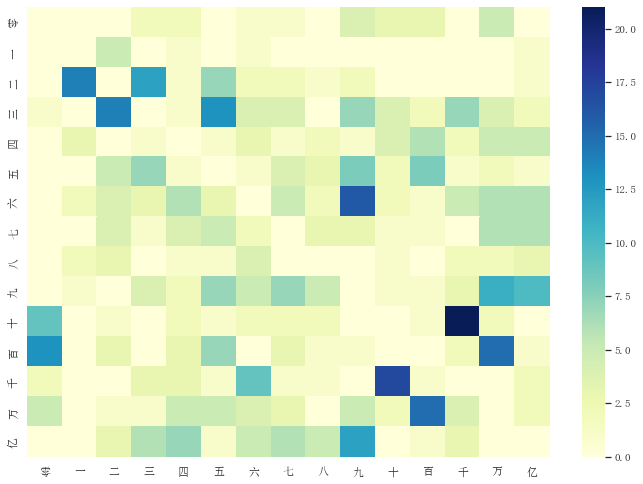

In [35]:
df.values[[np.arange(df.shape[0])]*2] = 0
sns.set(rc={'figure.figsize':(11.7,8.27)}, font="SimSun")
sns.heatmap(df, cmap="YlGnBu", xticklabels=chinese, yticklabels=chinese)

In [4]:
image = Image.open("chinese-mnist/Locate{1,1,1}.jpg")

In [5]:
data = []

In [6]:
data

[]

In [7]:
data = []
for p in range(1, 51):
    for t in range(1, 11):
        for n in range(1, 16):
            file = "chinese-mnist/Locate{" + str(p) + "," + str(t) + "," + str(n) + "}.jpg"
            data.append([n * 1.0, np.asarray(Image.open(file)).flatten()])

In [11]:
df = pd.DataFrame(data, columns = ["label", "features"])
df.to_csv("data.csv", index = False, header = False)
df

,label,features
0,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 1, 0, 0, ..."
1,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
7495,11.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7496,12.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7497,13.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7498,14.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import pandas as pd
import numpy as np
from  matplotlib import image
import pyspark
from PIL import Image
import findspark
findspark.init()
sc = pyspark.SparkContext(appName="CSE498")

print("HERE")
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark import SparkContext
from pyspark import SparkConf

# Load training data
data = sc.read.format("csv").load("data.csv")

print("HERE")

# Split the data into train and test
splits = sc.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [4, 5, 4, 3]

print("HERE")

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# train the model
model = trainer.fit(train)

# compute accuracy on the test set
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))
sc.stop()